# First Data Preprocessing

## USA_Student Data

In [2]:
import pandas as pd
df = pd.read_csv(r"E:\AMIT - Assignments and Materials\AI ONL 104\ML\Linear Regression S1\USA_Students.csv")
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [3]:
df.shape

(84, 2)

In [4]:
df.columns

Index(['SAT', 'GPA'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [6]:
# detect duplicates
df.duplicated().sum()

np.int64(1)

In [7]:
df['SAT'].unique()

array([1714, 1664, 1760, 1685, 1693, 1670, 1764, 1792, 1850, 1735, 1775,
       1712, 1773, 1872, 1755, 1674, 1842, 1786, 1761, 1722, 1663, 1687,
       1974, 1826, 1787, 1821, 2020, 1794, 1769, 1934, 1855, 1880, 1849,
       1808, 1954, 1777, 1831, 1865, 1966, 1702, 1990, 1925, 1824, 1956,
       1857, 1979, 1802, 1907, 1634, 1879, 1887, 1730, 1953, 1781, 1891,
       1964, 1893, 2041, 1832, 1861, 1931, 1933, 1778, 1975, 2021, 2015,
       1997, 1843, 1936, 1810, 1987, 1962, 2050])

In [8]:
df['GPA'].unique()

array([2.4 , 2.52, 2.54, 2.74, 2.83, 2.91, 3.  , 3.01, 3.02, 3.07, 3.08,
       3.12, 3.17, 3.19, 3.2 , 3.21, 3.24, 3.28, 3.29, 3.31, 3.32, 3.34,
       3.37, 3.38, 3.39, 3.4 , 3.41, 3.42, 3.44, 3.47, 3.48, 3.49, 3.5 ,
       3.51, 3.52, 3.54, 3.58, 3.59, 3.6 , 3.61, 3.62, 3.64, 3.65, 3.71,
       3.73, 3.76, 3.81])

### Detect and Handle Outliers

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
# detect outliers manually
q1 = df['SAT'].quantile(0.25)
q3 = df['SAT'].quantile(0.75)
IQR = q3 - q1
IQR

wisk_min = q1 - 1.5 * IQR
wisk_max = q3 + 1.5 * IQR

df[(df['SAT'] < wisk_min) | (df['SAT'] > wisk_max)]

,SAT,GPA


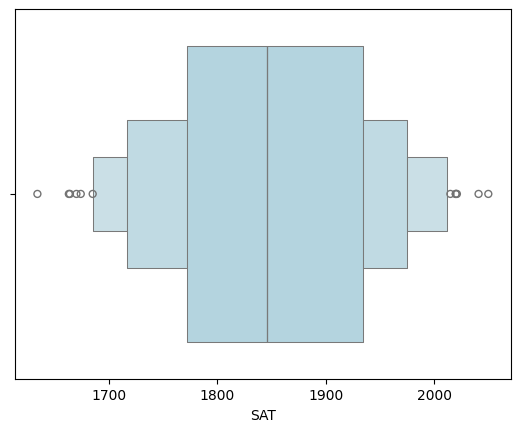

In [11]:
sns.boxenplot(x=df['SAT'], color='lightblue')
plt.show()

In [12]:
# detect outliers manually
q1 = df['GPA'].quantile(0.25)
q3 = df['GPA'].quantile(0.75)
IQR = q3 - q1
IQR

wisk_min = q1 - 1.5 * IQR
wisk_max = q3 + 1.5 * IQR

df[(df['GPA'] < wisk_min) | (df['GPA'] > wisk_max)]

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54


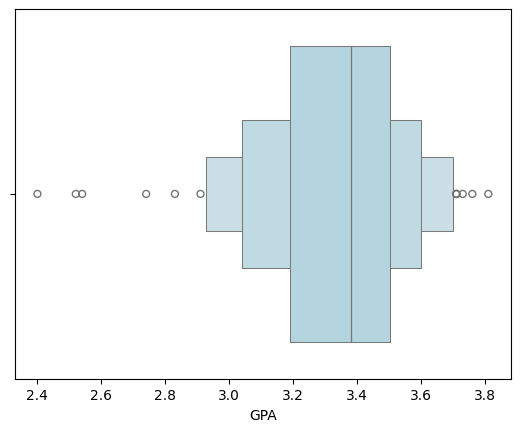

In [13]:
sns.boxenplot(x=df['GPA'], color='lightblue')
plt.show()

In [14]:
df

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [15]:
print(f"Original shape: {df.shape}")

# TASK: Remove outliers based on the IQR method
df = df[(df['GPA'] >= 2.55) & (df['GPA'] <= 4)]

print(f"Shape after removing outliers: {df.shape}")

Original shape: (84, 2)
Shape after removing outliers: (81, 2)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 3 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     81 non-null     int64  
 1   GPA     81 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.9 KB


In [17]:
df

,SAT,GPA
3,1685,2.74
4,1693,2.83
5,1670,2.91
6,1764,3.00
7,1764,3.00
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [18]:
# Feature
X = df[['GPA']]  

# Target
y = df['SAT']


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (64, 1)
X_test shape: (17, 1)


# Second Linear Regression Model

## 1. Ordinary least Square (OLS)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [21]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Display coefficients
print("Coefficients (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 3753.0274642756335
Coefficients (m): 304.22261016769824
Intercept (b): 826.6536211183411
MSE: 3753.0274642756335


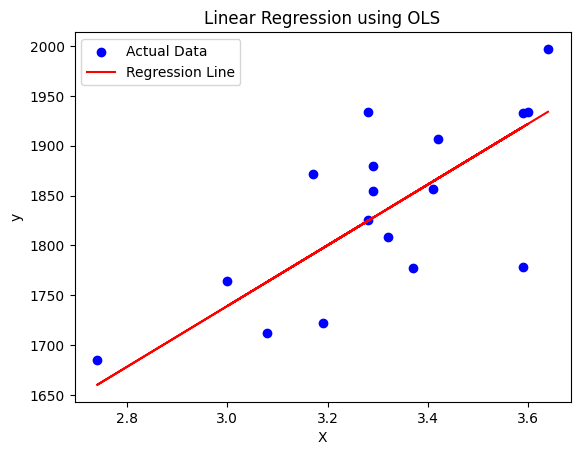

In [22]:
# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression using OLS')
plt.legend()
plt.show()  

## 2. Gradient Descent

Iteration 0: m=12.5404, b=3.7070, MSE=3277782.92
Iteration 100: m=464.5135, b=137.6623, MSE=30003.30
Iteration 200: m=500.7979, b=148.9187, MSE=8911.41
Iteration 300: m=503.5855, b=150.2874, MSE=8771.73
Iteration 400: m=503.6739, b=150.8590, MSE=8768.10
Iteration 500: m=503.5450, b=151.3661, MSE=8765.36
Iteration 600: m=503.3986, b=151.8676, MSE=8762.63
Iteration 700: m=503.2510, b=152.3683, MSE=8759.91
Iteration 800: m=503.1033, b=152.8686, MSE=8757.19
Iteration 900: m=502.9557, b=153.3685, MSE=8754.47
Iteration 1000: m=502.8083, b=153.8681, MSE=8751.76
Iteration 1100: m=502.6609, b=154.3673, MSE=8749.05
Iteration 1200: m=502.5137, b=154.8661, MSE=8746.34
Iteration 1300: m=502.3666, b=155.3645, MSE=8743.64
Iteration 1400: m=502.2195, b=155.8626, MSE=8740.95
Iteration 1500: m=502.0726, b=156.3603, MSE=8738.25
Iteration 1600: m=501.9258, b=156.8577, MSE=8735.56
Iteration 1700: m=501.7791, b=157.3547, MSE=8732.88
Iteration 1800: m=501.6326, b=157.8513, MSE=8730.20
Iteration 1900: m=501.4

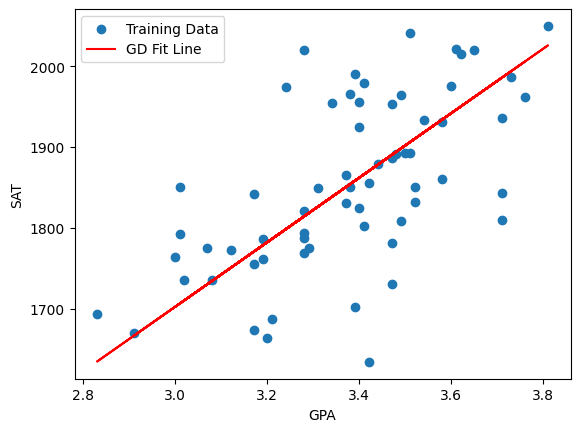

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Flatten the data
X_train_np = X_train.values.flatten()
y_train_np = y_train.values.flatten()
# Gradient Descent Implementation
def mse(m, b, X, y):
    y_pred = m * X + b
    return np.mean((y - y_pred) ** 2)
# Derivative with respect to m and b
def dm(m, b, X, y):
    y_pred = m * X + b
    return (-2 / len(X)) * np.sum(X * (y - y_pred))
# Derivative with respect to b
def db(m, b, X, y):
    y_pred = m * X + b
    return (-2 / len(X)) * np.sum(y - y_pred)
# Gradient Descent Function
def gradient_descent(X, y, start_m, start_b, learning_rate, num_iterations):
    m = start_m
    b = start_b
    history = []
    counter = 0
    for i in range(num_iterations):
        grad_m = dm(m, b, X, y)
        grad_b = db(m, b, X, y)

        m = m - learning_rate * grad_m
        b = b - learning_rate * grad_b
        counter = counter +1

        if i % 100 == 0:
            print(f"Iteration {i}: m={m:.4f}, b={b:.4f}, MSE={mse(m, b, X, y):.2f}")

        history.append((m, b, mse(m, b, X, y)))

    return m, b, history

# Initial parameters
start_m, start_b = 0, 0
learning_rate = 0.001
num_iterations = 100000 # Increased iterations for better convergence
# Run Gradient Descent
m_opt, b_opt, history = gradient_descent(X_train_np, y_train_np, start_m, start_b, learning_rate, num_iterations)
# Final results
print("Final m:", m_opt)
print("Final b:", b_opt)
print("Final MSE:", mse(m_opt, b_opt, X_train_np, y_train_np))

# Plot
plt.scatter(X_train_np, y_train_np, label="Training Data")
plt.plot(X_train_np, m_opt * X_train_np + b_opt, color='red', label="GD Fit Line")
plt.legend()
plt.xlabel("GPA")
plt.ylabel("SAT")
plt.show()


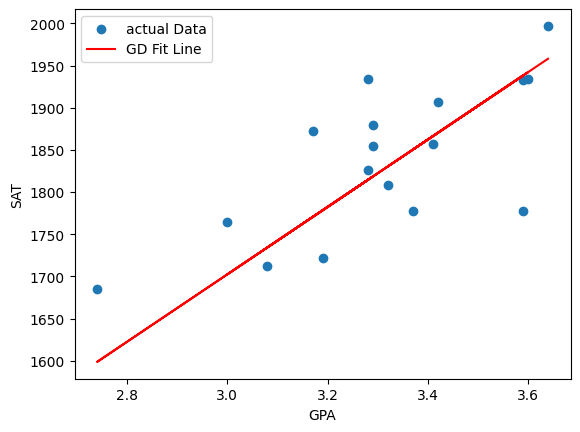

In [24]:
# Plot
plt.scatter(X_test, y_test, label="actual Data")
plt.plot(X_test, m_opt * X_test + b_opt, color='red', label="GD Fit Line")
plt.legend()
plt.xlabel("GPA")
plt.ylabel("SAT")
plt.show()


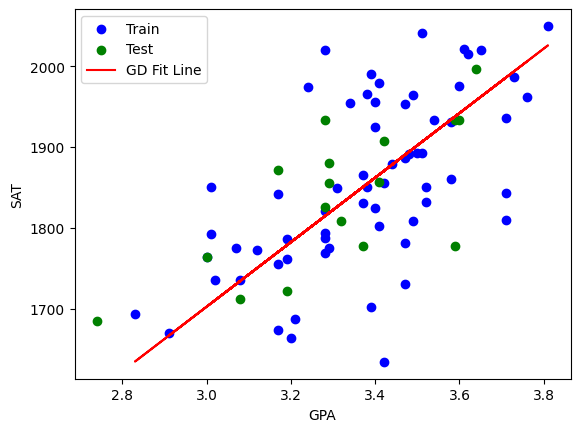

In [25]:
plt.scatter(X_train, y_train, label="Train", color='blue')
plt.scatter(X_test, y_test, label="Test", color='green')
plt.plot(X_train, m_opt * X_train + b_opt, color='red', label="GD Fit Line")
plt.xlabel("GPA")
plt.ylabel("SAT")
plt.legend()
plt.show()


In [26]:
# # Gradient Descent Implementation
# class GradientDescentLinearRegression:
#     def __init__(self, learning_rate=0.01, n_iterations=10000):
#         self.learning_rate = learning_rate
#         self.n_iterations = n_iterations
#         self.weights = None
#         self.bias = None

#     def fit(self, X, y):
#         n_samples, n_features = X.shape
#         self.weights = np.zeros(n_features)
#         self.bias = 0

#         for _ in range(self.n_iterations):
#             y_predicted = np.dot(X, self.weights) + self.bias
#             dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
#             db = (1 / n_samples) * np.sum(y_predicted - y)

#             self.weights -= self.learning_rate * dw
#             self.bias -= self.learning_rate * db

#     def predict(self, X):
#         y_predicted = np.dot(X, self.weights) + self.bias
#         return y_predicted
# # Create and train the model using Gradient Descent
# gd_model = GradientDescentLinearRegression(learning_rate=0.01, n_iterations=2000000)
# gd_model.fit(X.values, y.values)
# # Make predictions
# y_pred_gd = gd_model.predict(X.values)
# # Evaluate the model
# mse_gd = mean_squared_error(y, y_pred_gd)
# print(f"Mean Squared Error (Gradient Descent): {mse_gd}")
# # Plot the results
# plt.scatter(X.values, y.values, color='blue', label='Actual Data')
# plt.plot(X.values, y_pred_gd, color='green', label='Regression Line (GD)')
# plt.xlabel('X')
# plt.ylabel('y')
# plt.title('Linear Regression using Gradient Descent')
# plt.legend()
# plt.show()

## Polynomial Regression

Coefficients (m): 304.22261016769824
Intercept (b): 826.6536211183411


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


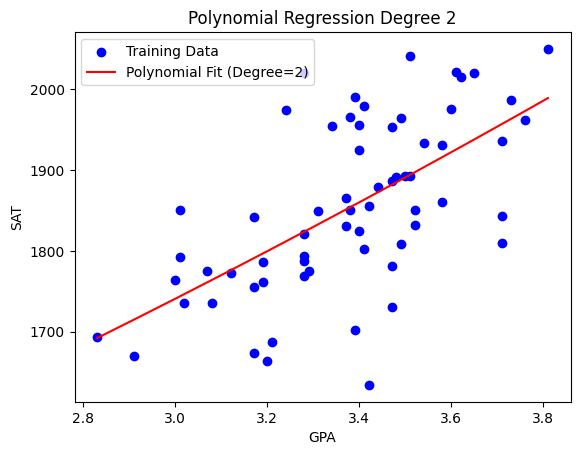

In [28]:
# poly_features = PolynomialFeatures(degree=2)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(X_train)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)
poly_reg_model.predict(poly_features)
poly_reg_model.score(poly_features, y_train)

print("Coefficients (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)

# plotting polynomial regression results
X_train_sorted = np.sort(X_train.values.flatten())
X_train_sorted_poly = poly.transform(X_train_sorted.reshape(-1, 1))
y_curve = poly_reg_model.predict(X_train_sorted_poly)

plt.scatter(X_train, y_train, color='blue', label="Training Data")
plt.plot(X_train_sorted, y_curve, color='red', label="Polynomial Fit (Degree=2)")
plt.xlabel("GPA")
plt.ylabel("SAT")
plt.title("Polynomial Regression Degree 2")
plt.legend()
plt.show()
